# PREDICTION OF COVID-19 INFECTION BASED ON SYMPTOMS USING SUPERVISED MACHINE LEARNING

#### Objectives
1. To classify whether an individual has COVID-19 infection or not based on symptoms using several classifier algorithms.
2. To evaluate the performance of machine learning algorithms in classifying the COVID-19 infections.

### Import Library

In [92]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import Dataset

The dataset used for COVID-19 predictive analysis in this study was extracted from Kaggle (see: https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence). This dataset has 5434 instances with 21 columns 

In [46]:
df=pd.read_csv("Covid Dataset.csv")
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


## DATA EXPLORATION

In [94]:
#Look for missing value
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Asthma                                     0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
COVID_19                                   0
dtype: int64

In [48]:
# Explore data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [49]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [50]:
df["COVID-19"].value_counts()

Yes    4383
No     1051
Name: COVID-19, dtype: int64

## DATA VISUALISATION

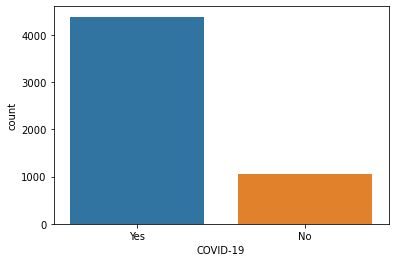

In [52]:
# Visualise target attribute
sns.countplot(df["COVID-19"])

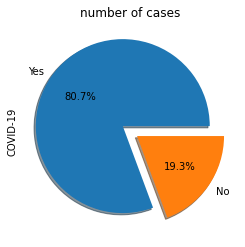

In [53]:
df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

#### Create Visualisation based on Top 5 COVID-19 Symptoms, announced by WHO

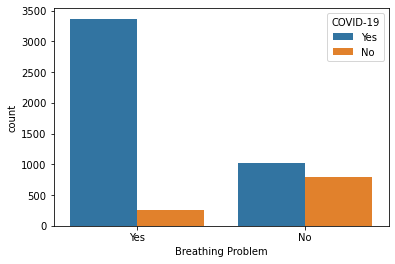

In [54]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=df)

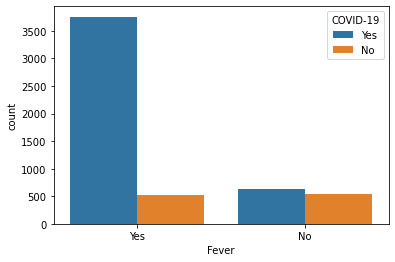

In [55]:
sns.countplot(x='Fever',hue='COVID-19',data=df);

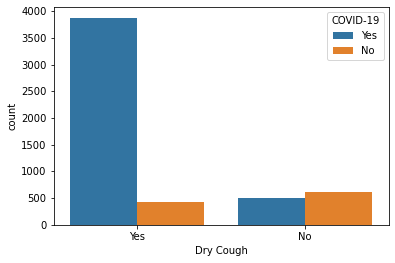

In [56]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=df)

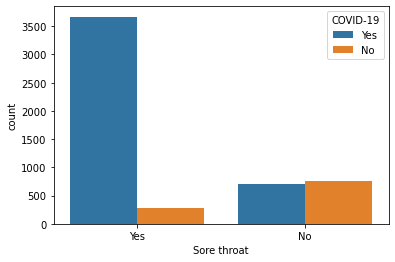

In [57]:
sns.countplot(x='Sore throat',hue='COVID-19',data=df)

## DATA PREPROCESSING

## Feature Transformation

Feature Transformation is performed since Machine Learning model need all information passed as input to be in numerical form

In [58]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [59]:
len(df.columns)

21

In [60]:
a=df.columns.to_list()
a

['Breathing Problem',
 'Fever',
 'Dry Cough',
 'Sore throat',
 'Running Nose',
 'Asthma',
 'Chronic Lung Disease',
 'Headache',
 'Heart Disease',
 'Diabetes',
 'Hyper Tension',
 'Fatigue ',
 'Gastrointestinal ',
 'Abroad travel',
 'Contact with COVID Patient',
 'Attended Large Gathering',
 'Visited Public Exposed Places',
 'Family working in Public Exposed Places',
 'Wearing Masks',
 'Sanitization from Market',
 'COVID-19']

In [61]:
for i in a:
    df[i]=e.fit_transform(df[i])
    

In [62]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


# Feature Selection

Feature Selection is performed to make sure only importance features associated with COVID-19 infections are being sent to machine learning model. This step involves extracting and selecting features to get the best classification results.

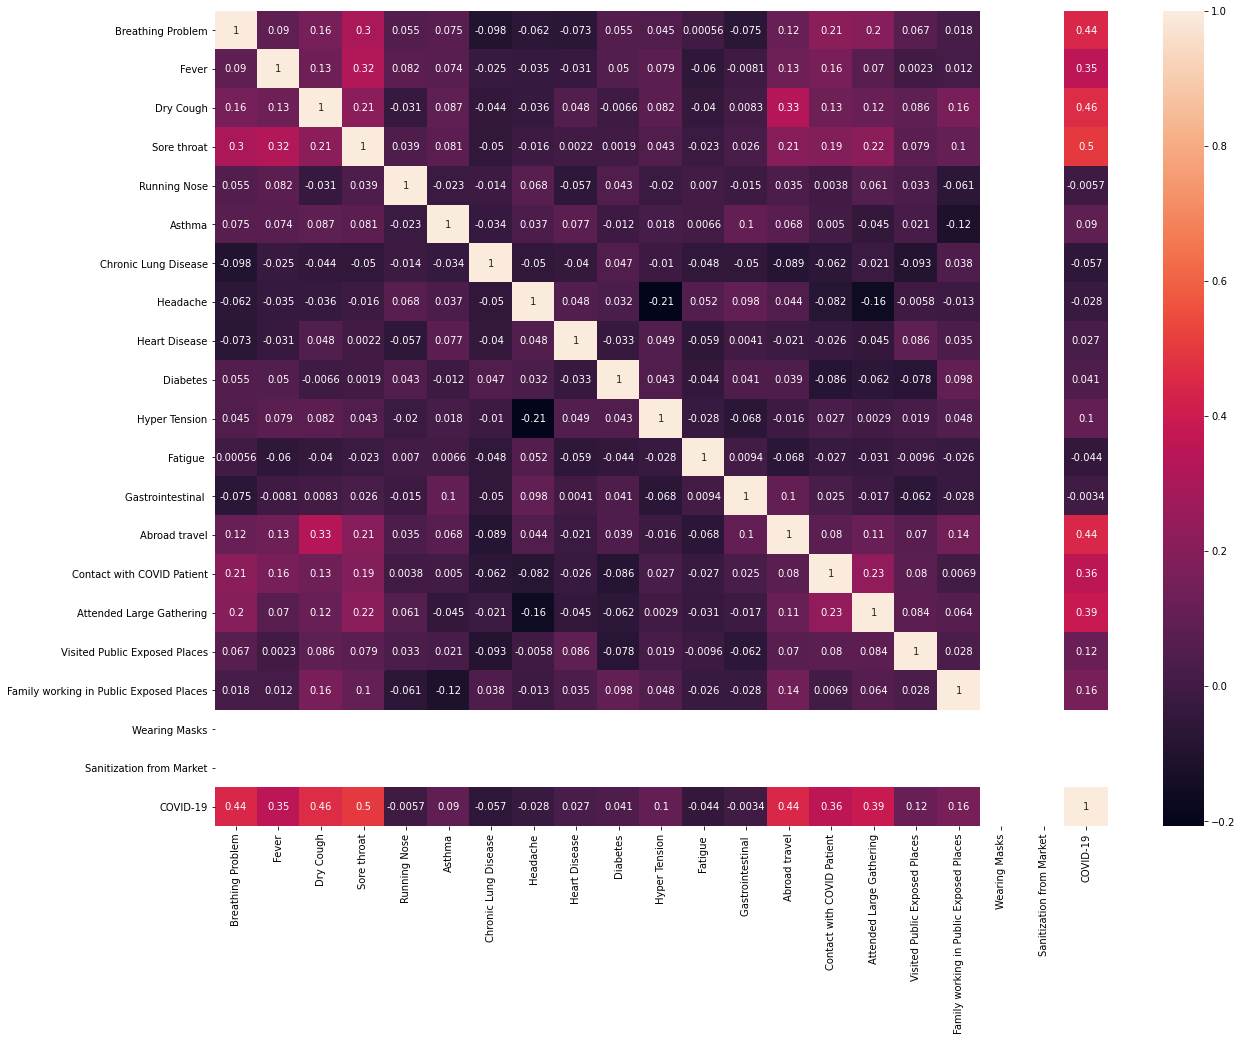

In [65]:
corrMatrix = df.corr()
plt.figure(figsize=(20,15))
ax=plt.subplot(111)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [66]:
b=corrMatrix
b=b.loc["COVID-19", :]
b


Breathing Problem                          0.443764
Fever                                      0.352891
Dry Cough                                  0.464292
Sore throat                                0.502848
Running Nose                              -0.005657
Asthma                                     0.089930
Chronic Lung Disease                      -0.056837
Headache                                  -0.027793
Heart Disease                              0.027072
Diabetes                                   0.040627
Hyper Tension                              0.102575
Fatigue                                   -0.044188
Gastrointestinal                          -0.003367
Abroad travel                              0.443875
Contact with COVID Patient                 0.357122
Attended Large Gathering                   0.390145
Visited Public Exposed Places              0.119755
Family working in Public Exposed Places    0.160208
Wearing Masks                                   NaN
Sanitization

##### Now we need to remove attributes that have correlation value less than 0.2

In [68]:
df=df.drop(["Running Nose", "Chronic Lung Disease", "Headache", "Fatigue ", "Gastrointestinal ", "Wearing Masks", "Sanitization from Market"],axis=1)

In [69]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Asthma,Heart Disease,Diabetes,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,0,0,1,1,0,1,0,1,1,1
1,1,1,1,1,1,0,0,0,0,0,1,1,0,1
2,1,1,1,1,1,0,1,0,1,0,0,0,0,1
3,1,1,1,0,1,1,1,0,1,0,1,1,0,1
4,1,1,1,1,0,1,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,0,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,0,1,1,0,0,0,0,0,1
5431,1,1,1,0,0,1,0,1,0,0,0,0,0,0
5432,1,1,1,0,0,1,0,0,0,0,0,0,0,0


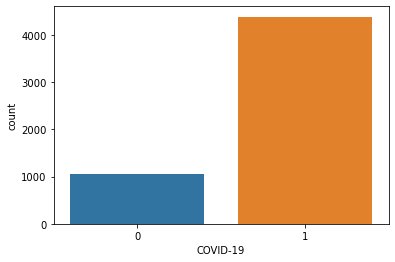

In [70]:
sns.countplot(df["COVID-19"])

In [71]:
df["COVID-19"].value_counts()

1    4383
0    1051
Name: COVID-19, dtype: int64

Since the data is imbalanced, data balancing should be done.

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [73]:
df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

In [74]:
df.rename(columns={"COVID-19":"COVID_19"}, inplace=True)

## Data Balancing

Data balancing is done to ensure that the model is not biased towards one class, where sample that is tested positive were randomly selected to train the model where the number of instances were made equally distributed with sample that is tested negative. 

In [75]:
df1 = df[df.COVID_19==0].sample(n=1051) # Extract 1051 rows with negative test
df2 = df[df.COVID_19==1].sample(n=1051) # Extract 1051 rows with positive test
df3= df1.append(df2) # Combine the data, with positive and negative cases
# df3 = df3.sample(frac = 1)

In [76]:
df3

,Breathing Problem,Fever,Dry Cough,Sore throat,Asthma,Heart Disease,Diabetes,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID_19
4728,0,1,1,0,0,0,1,0,0,0,0,0,0,0
4402,0,1,0,1,0,0,1,1,0,0,0,0,1,0
4185,0,0,0,0,1,1,1,0,0,0,1,0,0,0
4127,0,0,0,0,1,1,0,0,0,0,1,1,0,0
4774,0,1,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3246,1,1,1,0,0,1,0,0,0,1,1,0,1,1
5424,1,1,1,0,0,1,0,0,0,0,0,0,0,1
2269,0,1,1,1,1,1,1,1,0,0,1,1,1,1
5197,1,0,0,0,0,0,1,1,0,1,1,0,0,1


In [77]:
df3.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID_19'],
      dtype='object')

### Feature Selection

In [78]:
# Split dataset into features and target variables
feature_cols=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places']
x=df3[feature_cols]
y=df3['COVID_19']

### Splitting Data

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=123)

# DATA MODELLING

### 1. Decision Tree Model

In [80]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [81]:
# Create Decision Tree
dect = tree.DecisionTreeClassifier()

# Train Decision Tree 
dect=dect.fit(x_train,y_train)

# Predict with test dataset
y_pred = dect.predict(x_test)

#Score/Accuracy
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))




Decision Tree Accuracy: 0.9825673534072901


/Users/azimkamal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


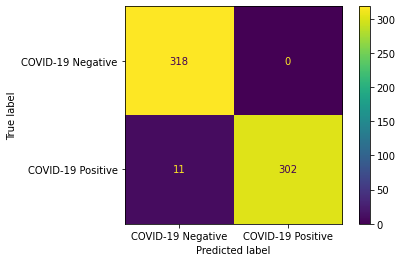

In [82]:
from sklearn.metrics import plot_confusion_matrix
categories_name=["COVID-19 Negative", "COVID-19 Positive"]
plot_confusion_matrix(dect, x_test, y_test,
                                     display_labels=categories_name)

In [83]:
from sklearn.metrics import precision_recall_fscore_support
a=precision_recall_fscore_support(y_test, y_pred, average='binary')
print("DT - Precision:", a[0])
print("DT - Recall:", a[1])
print("DT - F-Score:", a[2])

DT - Precision: 1.0
DT - Recall: 0.9648562300319489
DT - F-Score: 0.9821138211382114


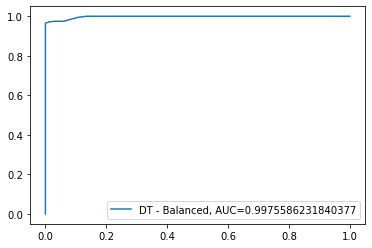

In [84]:
y_pred_proba = dect.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="DT - Balanced, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [85]:
fn=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places']
cn=['Positive', 'Negative']

In [93]:
'''
fn=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',
       'Contact with COVID Patient', 'Attended Large Gathering',
       'Visited Public Exposed Places',
       'Family working in Public Exposed Places']
cn=['Positive', 'Negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,25), dpi=1000)
tree.plot_tree(dect,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('DecisionTree.png')
'''

"\nfn=['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Asthma',\n       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Abroad travel',\n       'Contact with COVID Patient', 'Attended Large Gathering',\n       'Visited Public Exposed Places',\n       'Family working in Public Exposed Places']\ncn=['Positive', 'Negative']\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,25), dpi=1000)\ntree.plot_tree(dect,\n               feature_names = fn, \n               class_names=cn,\n               filled = True);\nfig.savefig('DecisionTree.png')\n"

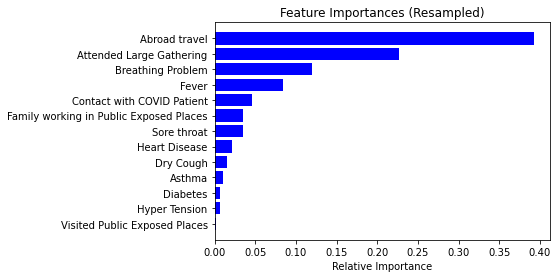

In [87]:
import numpy as np

importances = dect.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances (Resampled)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [fn[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### 2. Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression
logr= LogisticRegression()

# Train Decision Tree 
logr=logr.fit(x_train, y_train)

# Predict with test dataset
y_pred = logr.predict(x_test)

#Score/Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred))



Logistic Regression Accuracy: 0.9508716323296355


/Users/azimkamal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


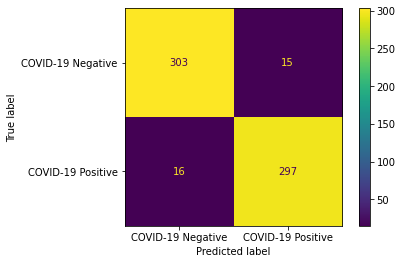

In [89]:


from sklearn.metrics import plot_confusion_matrix
categories_name=["COVID-19 Negative", "COVID-19 Positive"]
plot_confusion_matrix(logr, x_test, y_test,
                                     display_labels=categories_name)

In [90]:
from sklearn.metrics import precision_recall_fscore_support
a=precision_recall_fscore_support(y_test, y_pred, average='binary')
print("LR - Precision:", a[0])
print("LR - Recall:", a[1])
print("LR - F-Score:", a[2])

LR - Precision: 0.9519230769230769
LR - Recall: 0.9488817891373802
LR - F-Score: 0.9503999999999999


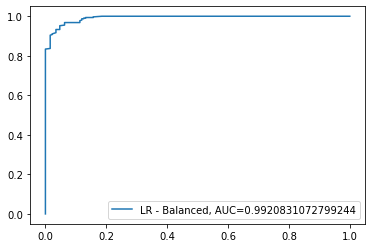

In [91]:
y_pred_proba = logr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="LR - Balanced, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### CONCLUSION

Based on the results,  we evolved from our predictive analysis emphasizing that Decision Tree gives high prediction of acquiring COVID-19 patients followed by Logistic Regression based on different parameters such as Precision, Recall and F1-Score. 

Decision Tree showed a robust performance in terms of Accuracy (98.94%), Precision (100%), Recall (96.49%) and F1-Score (98.41%), surpassing Logistic Regression with 95.09%, 95.19%, 94.89% and 95.04%, respectively. On the other hand, Decision Tree also possessed quite impressive value of AUC ROC curve with 99.63% compared to Logistic Regression (99.21%), indicating the effectiveness of Decision Tree classifier in classifying COVID-19 Positive or Negative.